# Preparing Data

In [1]:
import pandas as pd
import numpy as np

dfs = []
for i in range(2017,2022):
    year_df = pd.read_csv(f"./data/csv/{i}_lake_data.csv")
    year_df.insert(1,"Year",i)
    dfs.append(year_df)

df = pd.concat(dfs)
df

,STN Code,Year,Name of Monitoring Location,Type Water Body,State Name,Min Temperature,Max Temperature,Min Dissolved Oxygen,Max Dissolved Oxygen,Min pH,...,Min Conductivity,Max Conductivity,Min BOD,Max BOD,Min Nitrate N + Nitrite N,Max Nitrate N + Nitrite N,Min Fecal Coliform,Max Fecal Coliform,Min Total Coliform,Max Total Coliform
0,1790.0,2017,"PULICATE LAKE , NELLORE \nDIST.",LAKE,ANDHRA \nPRADESH,27.0,28.0,5.1,6.9,7.1,...,3270.0,156600.0,1.0,2.3,0.65,6.9,2.0,2.0,800.0,1600.0
1,2353.0,2017,"KONDACHARLA-AAVA LAKE, \nPARAWADA PHARMA CITY,...",LAKE,ANDHRA \nPRADESH,24.0,28.0,5.9,6.8,6.9,...,597.0,1034.0,1.3,2.3,1.16,3.36,11.0,29.0,350.0,2400.0
2,2205.0,2017,"MER BEEL AT MADHABPUR, \nASSAM",LAKE,ASSAM,20.0,27.0,2.2,7.2,5.7,...,50.0,128.0,1.0,16.2,0.1,1.7,300.0,2000.0,360.0,6400.0
3,2206.0,2017,"DALONI BEEL NEAR \nJOGIGHOPA, ASSAM",LAKE,ASSAM,22.0,36.0,5.1,6.0,6.6,...,54.0,153.0,0.9,2.8,0.1,1.4,300.0,1200.0,300.0,5300.0
4,1263.0,2017,ELANGABEEL SYSTEM POND \n(CONNECTED TO R. KOLA...,POND,ASSAM,22.0,34.0,0.7,4.6,6.8,...,263.0,972.0,4.5,14.7,0.8,5.7,1100.0,3500.0,730.0,21000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,1765.0,2021,"RABINDRASAROVAR NATIONAL LAKE, \nCALCUTTA, WES...",LAKE,WEST BENGAL,22.0,31.0,5.2,9.7,7.2,...,252,826,1.8,4.1,0.30,1.90,330,790,1100,1700
616,2544.0,2021,SAHEBBANDH AT PURULIA,LAKE,WEST BENGAL,22.0,32.0,8.8,9.8,7.0,...,311,422,2.7,7.3,0.30,0.80,3100,9400,4300,12000
617,2522.0,2021,SINCHAL LAKE FOR DARJEELING,LAKE,WEST BENGAL,7.0,16.0,7.1,8.1,6.9,...,13,29,1.0,1.1,0.30,0.30,70,110,110,210
618,2521.0,2021,"WATER RESERVIOR AT DELO LAKE, \nDARJELLING",LAKE,WEST BENGAL,9.0,24.0,7.2,8.2,6.9,...,20,36,1.0,1.8,0.30,0.30,60,130,110,330


In [2]:
#using only data of lakes
df = df[df["Type Water Body"]=="LAKE"]

#drop rows containing blank values
df = df.dropna()

#some entries in the pdf have - to represent a blank value so we must remove those as well
bad_vals = df.apply(lambda x:x=="-").any(axis=1)
bad_idx = bad_vals.index[bad_vals]
df = df.drop(bad_idx)

#replace below detection level with 0
df = df.replace("BDL",0)

df.reset_index(inplace=True,drop=True)
df

,STN Code,Year,Name of Monitoring Location,Type Water Body,State Name,Min Temperature,Max Temperature,Min Dissolved Oxygen,Max Dissolved Oxygen,Min pH,...,Min Conductivity,Max Conductivity,Min BOD,Max BOD,Min Nitrate N + Nitrite N,Max Nitrate N + Nitrite N,Min Fecal Coliform,Max Fecal Coliform,Min Total Coliform,Max Total Coliform
0,1790.0,2017,"PULICATE LAKE , NELLORE \nDIST.",LAKE,ANDHRA \nPRADESH,27.0,28.0,5.1,6.9,7.1,...,3270.0,156600.0,1.0,2.3,0.65,6.9,2.0,2.0,800.0,1600.0
1,2353.0,2017,"KONDACHARLA-AAVA LAKE, \nPARAWADA PHARMA CITY,...",LAKE,ANDHRA \nPRADESH,24.0,28.0,5.9,6.8,6.9,...,597.0,1034.0,1.3,2.3,1.16,3.36,11.0,29.0,350.0,2400.0
2,2205.0,2017,"MER BEEL AT MADHABPUR, \nASSAM",LAKE,ASSAM,20.0,27.0,2.2,7.2,5.7,...,50.0,128.0,1.0,16.2,0.1,1.7,300.0,2000.0,360.0,6400.0
3,2206.0,2017,"DALONI BEEL NEAR \nJOGIGHOPA, ASSAM",LAKE,ASSAM,22.0,36.0,5.1,6.0,6.6,...,54.0,153.0,0.9,2.8,0.1,1.4,300.0,1200.0,300.0,5300.0
4,2557.0,2017,"KAWAR LAKE, BEGUSARAI, \nBIHAR",LAKE,BIHAR,19.0,32.0,5.4,8.0,7.2,...,222.0,325.0,2.1,2.8,0.0,0.0,7000.0,26000.0,15000.0,38000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,1765.0,2021,"RABINDRASAROVAR NATIONAL LAKE, \nCALCUTTA, WES...",LAKE,WEST BENGAL,22.0,31.0,5.2,9.7,7.2,...,252,826,1.8,4.1,0.30,1.90,330,790,1100,1700
1089,2544.0,2021,SAHEBBANDH AT PURULIA,LAKE,WEST BENGAL,22.0,32.0,8.8,9.8,7.0,...,311,422,2.7,7.3,0.30,0.80,3100,9400,4300,12000
1090,2522.0,2021,SINCHAL LAKE FOR DARJEELING,LAKE,WEST BENGAL,7.0,16.0,7.1,8.1,6.9,...,13,29,1.0,1.1,0.30,0.30,70,110,110,210
1091,2521.0,2021,"WATER RESERVIOR AT DELO LAKE, \nDARJELLING",LAKE,WEST BENGAL,9.0,24.0,7.2,8.2,6.9,...,20,36,1.0,1.8,0.30,0.30,60,130,110,330


In [3]:
#Required Columns
L = [
  "Min Temperature","Max Temperature","Min Dissolved Oxygen","Max Dissolved Oxygen",
  "Min pH","Max pH","Min Conductivity","Max Conductivity","Min BOD","Max BOD",
  "Min Nitrate N + Nitrite N","Max Nitrate N + Nitrite N","Min Fecal Coliform",
  "Max Fecal Coliform","Min Total Coliform","Max Total Coliform"
]
df[L] = df[L].apply(pd.to_numeric)

#dropping redundant columns
df = df.drop(columns=["Name of Monitoring Location","Type Water Body"])
df = df.astype({"STN Code":int})
df

,STN Code,Year,State Name,Min Temperature,Max Temperature,Min Dissolved Oxygen,Max Dissolved Oxygen,Min pH,Max pH,Min Conductivity,Max Conductivity,Min BOD,Max BOD,Min Nitrate N + Nitrite N,Max Nitrate N + Nitrite N,Min Fecal Coliform,Max Fecal Coliform,Min Total Coliform,Max Total Coliform
0,1790,2017,ANDHRA \nPRADESH,27.0,28.0,5.1,6.9,7.1,8.5,3270.0,156600.0,1.0,2.3,0.65,6.90,2.0,2.0,800.0,1600.0
1,2353,2017,ANDHRA \nPRADESH,24.0,28.0,5.9,6.8,6.9,8.4,597.0,1034.0,1.3,2.3,1.16,3.36,11.0,29.0,350.0,2400.0
2,2205,2017,ASSAM,20.0,27.0,2.2,7.2,5.7,7.0,50.0,128.0,1.0,16.2,0.10,1.70,300.0,2000.0,360.0,6400.0
3,2206,2017,ASSAM,22.0,36.0,5.1,6.0,6.6,7.8,54.0,153.0,0.9,2.8,0.10,1.40,300.0,1200.0,300.0,5300.0
4,2557,2017,BIHAR,19.0,32.0,5.4,8.0,7.2,7.9,222.0,325.0,2.1,2.8,0.00,0.00,7000.0,26000.0,15000.0,38000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,1765,2021,WEST BENGAL,22.0,31.0,5.2,9.7,7.2,8.5,252.0,826.0,1.8,4.1,0.30,1.90,330.0,790.0,1100.0,1700.0
1089,2544,2021,WEST BENGAL,22.0,32.0,8.8,9.8,7.0,7.6,311.0,422.0,2.7,7.3,0.30,0.80,3100.0,9400.0,4300.0,12000.0
1090,2522,2021,WEST BENGAL,7.0,16.0,7.1,8.1,6.9,7.6,13.0,29.0,1.0,1.1,0.30,0.30,70.0,110.0,110.0,210.0
1091,2521,2021,WEST BENGAL,9.0,24.0,7.2,8.2,6.9,7.6,20.0,36.0,1.0,1.8,0.30,0.30,60.0,130.0,110.0,330.0


In [4]:
df.dtypes

STN Code                       int64
Year                           int64
State Name                    object
Min Temperature              float64
Max Temperature              float64
Min Dissolved Oxygen         float64
Max Dissolved Oxygen         float64
Min pH                       float64
Max pH                       float64
Min Conductivity             float64
Max Conductivity             float64
Min BOD                      float64
Max BOD                      float64
Min Nitrate N + Nitrite N    float64
Max Nitrate N + Nitrite N    float64
Min Fecal Coliform           float64
Max Fecal Coliform           float64
Min Total Coliform           float64
Max Total Coliform           float64
dtype: object

# Calculating WQI

To calculate water quality index, we can use the Weighted Arithmetic Mean method

$$ WQI = \frac{\sum q_iw_i}{\sum w_i} $$

Here, $w_i$ represents unit weight of ith parameter towards overall water quality and $q_i$ is the quality estimate of the ith parameter. They can be calculated as follows

$$ q_i = \frac{V_i - V_{ideal} }{S_i - V_{ideal}} * 100 $$

$$ w_i = \frac{K}{S_i} $$

$K$ is the constant of proportionality and is defined by 

$$ K = \frac{1}{\sum \frac{1}{S_i}} $$ <br />


In [5]:
stv = np.array([5,8.5,2250,3,45,200,1000])
K = 1/np.sum(stv)
w = [K/x for x in stv]
w_n = np.array([x/sum(w) for x in w])
print(w_n)

[0.29427038 0.17310023 0.00065393 0.49045064 0.03269671 0.00735676
 0.00147135]


Using the table, we can calculate the unit weights,

| Parameter | Unit weights ($w_i$) |
|:-:|:-:|
| Dissolved Oxygen (mg/L) | 0.2943 |
| pH | 0.1731 |
| Conductivity (µS/cm) |  0.0007 |
| Biological Oxygen Demand (mg/L) | 0.4904 |
| Nitrate (mg/L) | 0.0327 |
| Fecal Coliform (per 100 mL) | 0.0073 |
| Total Coliform (per 100 mL) | 0.0015 |

In [6]:
idv = np.array([14.6,7,0,0,0,0,0])
diff = stv-idv

def calculate_wqi(row):
    q = 100*(row - idv)/diff
    return np.dot(q,w_n)

example_row = np.array([6.8,7.8,1179,4.6,3.56,23,240])
calculate_wqi(example_row)

108.75676031175138

# Interpolating Average Statistics

Each of the columns of the data provided has the min and max values for each parameter in a lake.
Since all unit weights are positive and all standard values are greater than ideal values, we can see that WQI is increasing wrt to each parameter. Thus,
$$ WQI_{\text{min}} = \frac{\sum q_{i,\text{min}} \cdot w_i}{\sum w_i} $$

$$ WQI_{\text{max}} = \frac{\sum q_{i,\text{max}} \cdot w_i}{\sum w_i} $$

Assuming that WQI is normally distributed over all the samples for a given lake, the average value of WQI is roughly the arithmetic mean of max and min values.

$$ WQI_{\text{avg}} = \frac{WQI_{\text{min}} + WQI_{\text{max}}}{2} $$

Since WQI is linearly dependent on all variables, this is equivalent to first taking the averages of all variables and then plugging it into the formula, i.e

$$ WQI_{\text{avg}}  = \frac{\sum \frac{q_{i,\text{min}} + q_{i,\text{max}}}{2} \cdot w_i}{\sum w_i} = \frac{\sum q_{i,\text{avg}} \cdot w_i}{\sum w_i} $$


In [7]:
def avg(col1,col2):
    return (col1.to_numpy() + col2.to_numpy())/2

pd.set_option('mode.chained_assignment',None)

df_a = pd.DataFrame()
df_a["Dissolved Oxygen"] = avg(df["Min Dissolved Oxygen"],df["Max Dissolved Oxygen"])
df_a["pH"] = avg(df["Min pH"],df["Max pH"])
df_a["Conductivity"] = avg(df["Min Conductivity"],df["Max Conductivity"])
df_a["BOD"] = avg(df["Min BOD"],df["Max BOD"])
df_a["Nitrate N + Nitrite N"] = avg(df["Min Nitrate N + Nitrite N"],df["Max Nitrate N + Nitrite N"])
df_a["Fecal Coliform"] = avg(df["Min Fecal Coliform"],df["Max Fecal Coliform"])
df_a["Total Coliform"] = avg(df["Min Total Coliform"],df["Max Total Coliform"])
df_a.rename(columns={
    'Dissolved Oxygen':'DO',
    'Conductivity':'EC',
    'Nitrate N + Nitrite N':'NN',
    'Fecal Coliform':'FC',
    'Total Coliform':'TC'
},inplace=True)
df_a

,DO,pH,EC,BOD,NN,FC,TC
0,6.00,7.80,79935.0,1.65,3.775,2.0,1200.0
1,6.35,7.65,815.5,1.80,2.260,20.0,1375.0
2,4.70,6.35,89.0,8.60,0.900,1150.0,3380.0
3,5.55,7.20,103.5,1.85,0.750,750.0,2800.0
4,6.70,7.55,273.5,2.45,0.000,16500.0,26500.0
...,...,...,...,...,...,...,...
1088,7.45,7.85,539.0,2.95,1.100,560.0,1400.0
1089,9.30,7.30,366.5,5.00,0.550,6250.0,8150.0
1090,7.60,7.25,21.0,1.05,0.300,90.0,160.0
1091,7.70,7.25,28.0,1.40,0.300,95.0,220.0


# Classification of water bodies

In [8]:
wqi = df_a.apply(calculate_wqi,axis=1)
df_a["WQI"] = wqi
df_a = df_a[df_a["WQI"]>=0]
df_a.dropna()
df_a.insert(0,"STN Code",df["STN Code"])
df_a.insert(1,"Year",df["Year"])
df_a

,STN Code,Year,DO,pH,EC,BOD,NN,FC,TC,WQI
0,1790,2017,6.00,7.80,79935.0,1.65,3.775,2.0,1200.0,65.349937
1,2353,2017,6.35,7.65,815.5,1.80,2.260,20.0,1375.0,62.680699
2,2205,2017,4.70,6.35,89.0,8.60,0.900,1150.0,3380.0,168.236907
3,2206,2017,5.55,7.20,103.5,1.85,0.750,750.0,2800.0,63.521839
4,2557,2017,6.70,7.55,273.5,2.45,0.000,16500.0,26500.0,135.216775
...,...,...,...,...,...,...,...,...,...,...
1088,1765,2021,7.45,7.85,539.0,2.95,1.100,560.0,1400.0,82.315144
1089,2544,2021,9.30,7.30,366.5,5.00,0.550,6250.0,8150.0,125.689595
1090,2522,2021,7.60,7.25,21.0,1.05,0.300,90.0,160.0,41.884995
1091,2521,2021,7.70,7.25,28.0,1.40,0.300,95.0,220.0,47.327811


# Distribution of Data

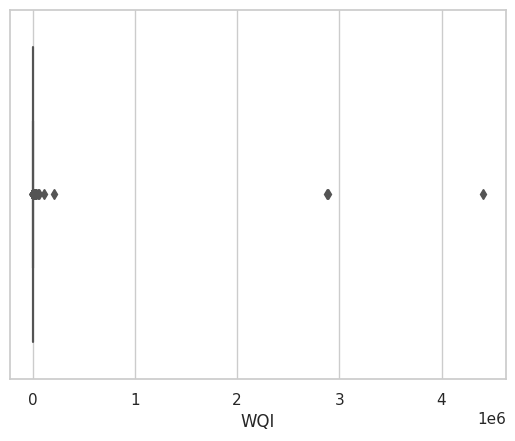

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

# seaborn theme defaults
matplotlib_inline.backend_inline.set_matplotlib_formats('png')
sns.set_theme()
sns.set_style("whitegrid")
sns.set_palette("muted")

def boxplot(feature):
    sns.boxplot(data=df_a,x=feature,orient='h')

boxplot("WQI")

We can see that there is an extreme right skew to the WQI, with significant outliers. This leads to nonsensical values for water quality index. Hence, we remove these extreme outliers. For this, we use the a process described in https://www.researchgate.net/publication/245023815_Outlier_detection_for_skewed_data to determine outliers on the right. 

In [10]:
from statsmodels.stats.stattools import medcouple

MC = float(medcouple(df_a["WQI"]))
q1,q3 = np.percentile(df_a["WQI"],[25,75],method='lower')
iqr = q3 - q1
print(f"{MC = }")
print(f"{q1 = }")
print(f"{q3 = }")
print(f"{iqr = }")

MC = 0.7051828302648432
q1 = 65.26663065754579
q3 = 297.0524219072226
iqr = 231.7857912496768


In [11]:
upper_fence = q3 + (1.5*iqr*np.exp(3*MC))
print(upper_fence)

3180.745961476936


In [12]:
df_a = df_a[df_a["WQI"]<upper_fence]
df_a

,STN Code,Year,DO,pH,EC,BOD,NN,FC,TC,WQI
0,1790,2017,6.00,7.80,79935.0,1.65,3.775,2.0,1200.0,65.349937
1,2353,2017,6.35,7.65,815.5,1.80,2.260,20.0,1375.0,62.680699
2,2205,2017,4.70,6.35,89.0,8.60,0.900,1150.0,3380.0,168.236907
3,2206,2017,5.55,7.20,103.5,1.85,0.750,750.0,2800.0,63.521839
4,2557,2017,6.70,7.55,273.5,2.45,0.000,16500.0,26500.0,135.216775
...,...,...,...,...,...,...,...,...,...,...
1088,1765,2021,7.45,7.85,539.0,2.95,1.100,560.0,1400.0,82.315144
1089,2544,2021,9.30,7.30,366.5,5.00,0.550,6250.0,8150.0,125.689595
1090,2522,2021,7.60,7.25,21.0,1.05,0.300,90.0,160.0,41.884995
1091,2521,2021,7.70,7.25,28.0,1.40,0.300,95.0,220.0,47.327811


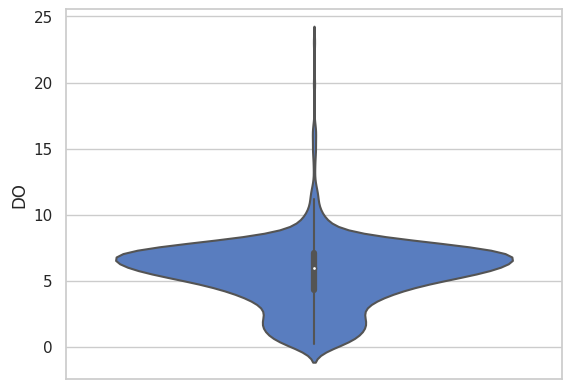

In [13]:
def violinplot(feature):
    sns.violinplot(data=df_a,y=feature,orient='v')
    
violinplot("DO")

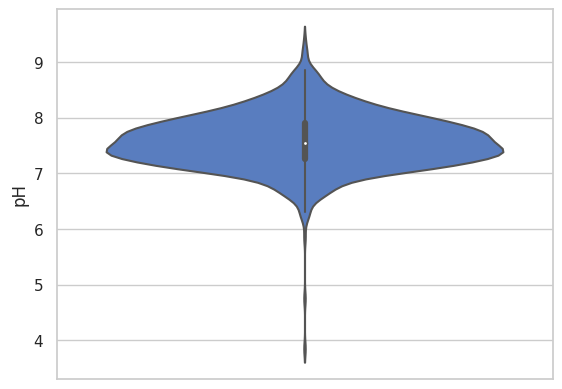

In [14]:
violinplot("pH")

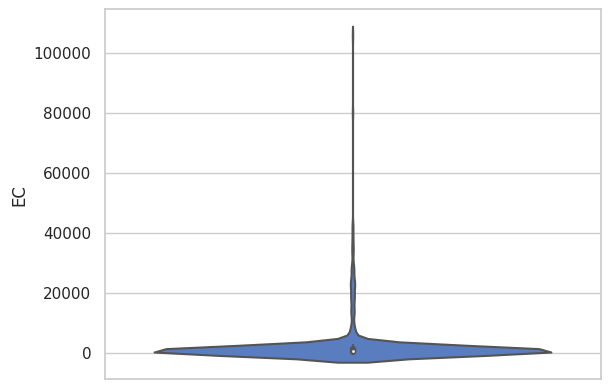

In [15]:
violinplot("EC")

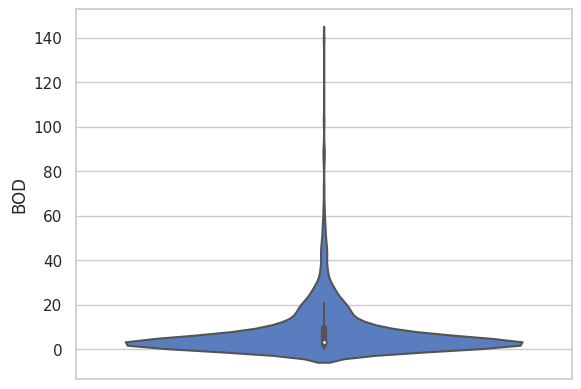

In [16]:
violinplot("BOD")

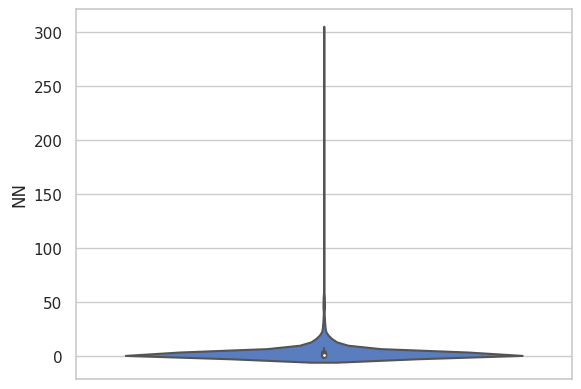

In [17]:
violinplot("NN")

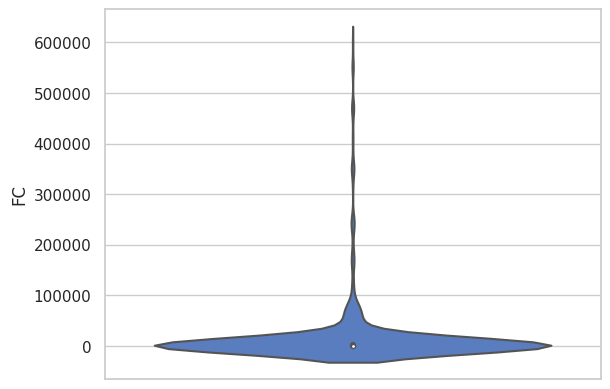

In [18]:
violinplot("FC")

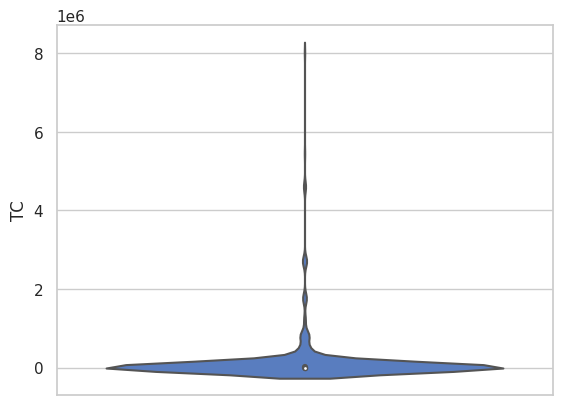

In [19]:
violinplot("TC")

Even after removing extreme values of WQI, we see that most parameters have skewed distributions with outliers. In order to deal with this, we use robust scaling instead of standardizing the data.

In [20]:
counts = [0]*5
counts[0] = len(df_a[df_a["WQI"]<50])
counts[1] = len(df_a[(df_a["WQI"]>=50) & (df_a["WQI"]<100)])
counts[2] = len(df_a[(df_a["WQI"]>=100) & (df_a["WQI"]<200)])
counts[3] = len(df_a[(df_a["WQI"]>=200) & (df_a["WQI"]<300)])
counts[4] = len(df_a[df_a["WQI"]>=300])
print(counts)

[84, 455, 197, 84, 235]


| WQI | Classification | Frequency |
| :-: | :-: | :-: |
| < 50 | Excellent | 84 |
| 50 - 100 | Good | 455 |
| 100 - 200 | Poor | 197 |
| 200 - 300 | Very Poor | 84 |
| > 300 | Unsuitable for Drinking | 235 |

# Predicting WQI with lesser parameters

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

seed = 42
ncols = ["DO","pH","EC","BOD","NN","FC","TC"]
X,y = df_a[ncols],df_a["WQI"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=seed)

s = RobustScaler()
X_train_ = s.fit_transform(X_train)
X_test_ = s.transform(X_test)

sdf = pd.DataFrame(X_train_,columns=ncols)
sdf["WQI"] = pd.Series(y_train).values

sdf

,DO,pH,EC,BOD,NN,FC,TC,WQI
0,0.017167,2.166667,3.538630,2.091503,-0.453392,-0.046646,-0.056322,366.689701
1,-1.716738,0.333333,-0.348894,-0.150327,-0.157549,-0.073301,-0.108745,88.850397
2,-1.888412,-0.166667,1.272181,3.071895,3.028446,-0.043459,-0.035079,490.857390
3,-0.686695,0.500000,38.496860,-0.084967,-0.330853,0.447631,0.155907,93.487217
4,0.394850,1.250000,-0.208026,-0.215686,0.260832,-0.073301,-0.086918,68.278588
...,...,...,...,...,...,...,...,...
839,-0.738197,-0.833333,0.449358,3.202614,0.444639,20.339852,34.521803,647.245341
840,-1.596567,-0.083333,1.128583,3.333333,15.551860,-0.053600,-0.056516,524.040228
841,-0.343348,1.166667,-0.260988,-0.196078,-0.175055,-0.061423,-0.053983,76.752673
842,0.583691,0.833333,0.128856,0.202614,-0.315098,26.986238,15.803167,299.681630


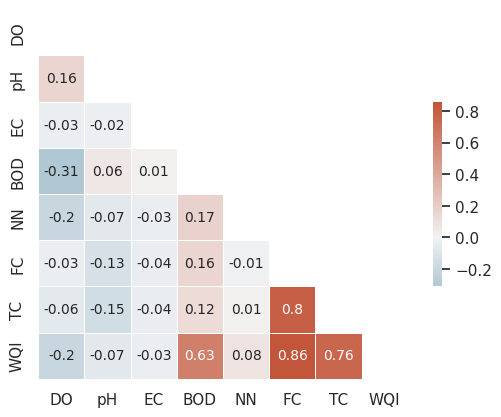

In [22]:
cmatrix = sdf.corr(method='pearson').round(2)
mask = np.triu(np.ones_like(cmatrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cmatrix, mask=mask, cmap=cmap,center=0,
            square=True, linewidths=.5,cbar_kws={"shrink": .5},annot=True,annot_kws={"fontsize":10})
plt.show()

In order to reduce the number of features required for prediction, we can select the features with higher correlation to WQI and lesser inter correlation. Considering the highest correlations, we get BOD,Fecal Coliform and Total Coliform. Since Total Coliform is highly correlated with Fecal Coliform, we replace it with Dissolved Oxygen for our 3rd feature.

In [23]:
selected_features = [0,3,5] # DO,BOD,FC
del_ft = [1,2,4,6]
X_train_ = np.delete(X_train_,del_ft,axis=1)
X_test_ = np.delete(X_test_,del_ft,axis=1)
print(X_train_.shape)

(844, 3)


# Training Models

### OLS

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

reg = LinearRegression().fit(X_train_,y_train)
y_hat = reg.predict(X_test_)
print(f"RMSE: {mean_squared_error(y_test,y_hat,squared=False)}")
print(f"R2 : {r2_score(y_test,y_hat)}")

RMSE: 19.86430631776866
R2 : 0.9972224176300795


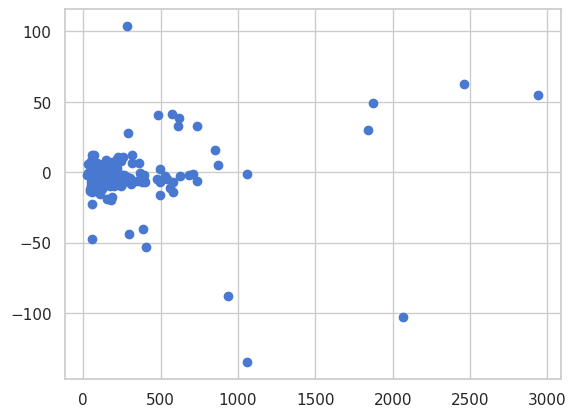

In [25]:
residuals = y_test-y_hat
plt.scatter(y_hat,residuals)
plt.show()

In [26]:
print(reg.coef_)

[-11.87136011 124.46713344   8.11960567]


To repurpose a regression model to classify, we use the previously mentioned WQI to WQC conversion table to convert predicted values for WQI into predicted WQC

Accuracy = 0.909952606635071


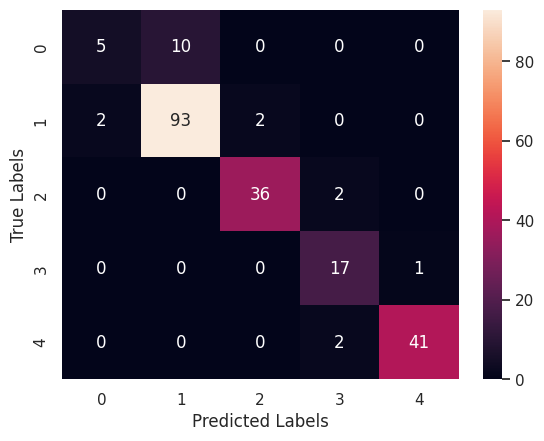

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix

# 0 = Excellent, 1 = Good, 2 = Poor, 3 = Very Poor, 4 = Unsuitable for Drinking
def classify(y):
    y_c = np.zeros_like(y,dtype=int)
    for i in range(len(y)):
        if y[i] < 50:
            y_c[i] = 0
        elif y[i] < 100:
            y_c[i] = 1
        elif y[i] < 200:
            y_c[i] = 2
        elif y[i] < 300:
            y_c[i] = 3
        else:
            y_c[i] = 4
    return y_c

#testing classification accuracy
y_c = classify(y_test.to_numpy())
y_c_hat = classify(y_hat)
print(f'Accuracy = {accuracy_score(y_c,y_c_hat)}')
cm = confusion_matrix(y_c,y_c_hat)
sns.heatmap(cm,annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

### Support Vector Regression

In [28]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

params = {'C':range(100,1500,100),'epsilon':np.linspace(0.05,0.25,10)}
clf = GridSearchCV(SVR(),params,n_jobs=5)
clf.fit(X_train_,y_train)
reg2 = clf.best_estimator_
y_hat2 = reg2.predict(X_test_)
print(f"RMSE: {mean_squared_error(y_test,y_hat2,squared=False)}")
print(f"R2 : {r2_score(y_test,y_hat2)}")

RMSE: 89.66779446550186
R2 : 0.9434030386354354


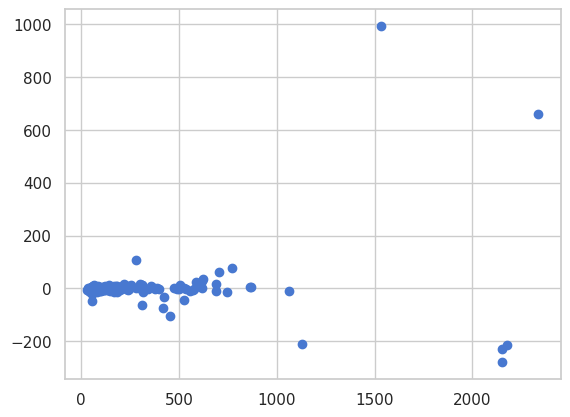

In [29]:
residuals = y_test-y_hat2
plt.scatter(y_hat2,residuals)
plt.show()

Accuracy = 0.9146919431279621


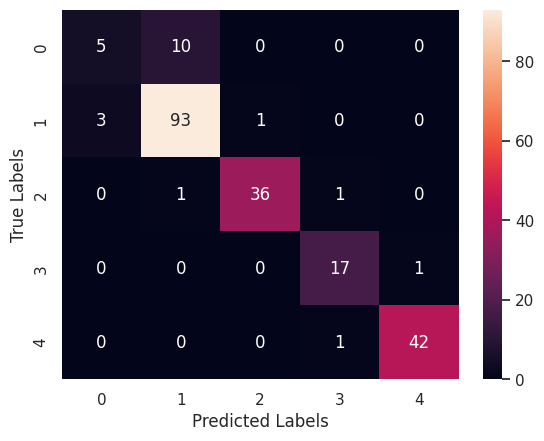

In [30]:
y_c_hat2 = classify(y_hat2)
print(f'Accuracy = {accuracy_score(y_c,y_c_hat2)}')
cm = confusion_matrix(y_c,y_c_hat2)
sns.heatmap(cm,annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Classification Models

### Multinomial Logistic Regression

Accuracy = 0.8625592417061612


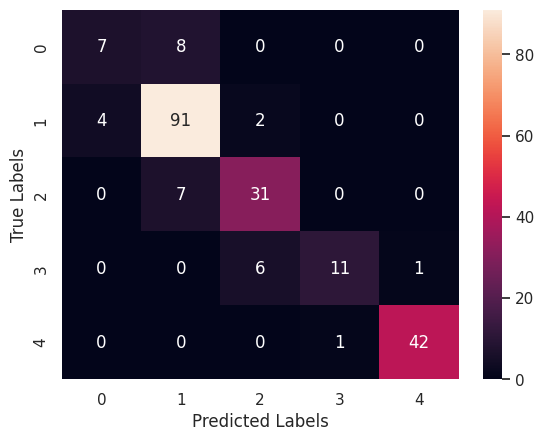

In [31]:
from sklearn.linear_model import LogisticRegression

y_c_train = classify(y_train.to_numpy())
w = {
    0 : 3,
    1 : 1,
    2 : 1.2,
    3 : 1.2,
    4 : 1
}
clf = LogisticRegression(random_state=seed,solver='newton-cg',class_weight=w).fit(X_train_,y_c_train)
y_c_hat3 = clf.predict(X_test_)
print(f'Accuracy = {accuracy_score(y_c,y_c_hat3)}')
cm = confusion_matrix(y_c,y_c_hat3)
sns.heatmap(cm,annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

### Decision Tree

Accuracy = 0.8767772511848341


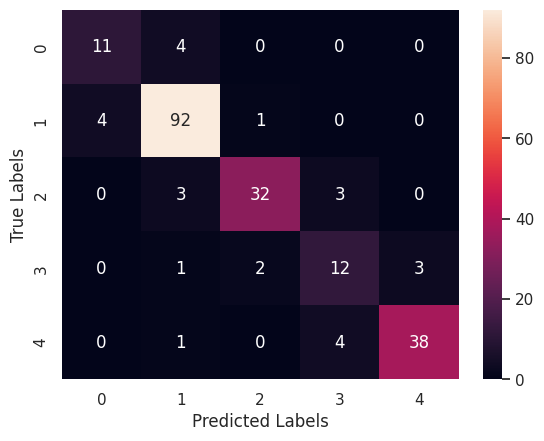

In [32]:
from sklearn.tree import DecisionTreeClassifier

params = {'max_depth':range(3,30)}
clf = GridSearchCV(DecisionTreeClassifier(random_state=seed),params,n_jobs=5)
clf.fit(X_train_,y_c_train)
dt = clf.best_estimator_
y_c_hat4 = dt.predict(X_test_)
print(f'Accuracy = {accuracy_score(y_c,y_c_hat4)}')
cm = confusion_matrix(y_c,y_c_hat4)
sns.heatmap(cm,annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

### Feedforward Neural Network

In [33]:
import torch
from torch.utils.data import DataLoader,TensorDataset

def mask(class_arr):
    m = np.zeros((len(class_arr),5),dtype=int)
    for i,v in enumerate(class_arr):
        m[i,v] = 1
    return m

#converting all dataframes to pytorch tensors
X_train_tensor = torch.Tensor(X_train_)
train_target = torch.Tensor(mask(y_c_train))
X_test_tensor = torch.Tensor(X_test_)
test_target = torch.Tensor(mask(y_c))

#grouping training and test data
training_data = TensorDataset(X_train_tensor,train_target)
test_data = TensorDataset(X_test_tensor,test_target)

params = {'batch_size': 16,
          'shuffle': True}
train_loader = DataLoader(training_data,**params)
test_loader = DataLoader(test_data,**params)

print(len(training_data))

844


In [34]:
from torch import nn

model = nn.Sequential(
    nn.Linear(3,8),
    nn.ELU(),
    nn.Linear(8,8),
    nn.ELU(),
    nn.Linear(8,8),
    nn.ELU(),
    nn.Linear(8,5),
    nn.Softmax(dim=1)
)

print(model)

Sequential(
  (0): Linear(in_features=3, out_features=8, bias=True)
  (1): ELU(alpha=1.0)
  (2): Linear(in_features=8, out_features=8, bias=True)
  (3): ELU(alpha=1.0)
  (4): Linear(in_features=8, out_features=8, bias=True)
  (5): ELU(alpha=1.0)
  (6): Linear(in_features=8, out_features=5, bias=True)
  (7): Softmax(dim=1)
)


In [35]:
dummy_run = torch.rand(10,3)
print(model(dummy_run))

tensor([[0.2366, 0.2259, 0.1877, 0.1791, 0.1707],
        [0.2418, 0.2228, 0.1831, 0.1800, 0.1723],
        [0.2310, 0.2218, 0.1910, 0.1796, 0.1766],
        [0.2381, 0.2246, 0.1864, 0.1788, 0.1720],
        [0.2384, 0.2245, 0.1861, 0.1782, 0.1728],
        [0.2379, 0.2234, 0.1862, 0.1787, 0.1738],
        [0.2343, 0.2227, 0.1885, 0.1790, 0.1755],
        [0.2389, 0.2241, 0.1857, 0.1788, 0.1724],
        [0.2409, 0.2246, 0.1844, 0.1783, 0.1718],
        [0.2466, 0.2261, 0.1807, 0.1786, 0.1679]], grad_fn=<SoftmaxBackward0>)


In [36]:
loss_fn = nn.CrossEntropyLoss(weight = torch.Tensor([4,1,1.2,1.2,1]))
opt = torch.optim.Adam(model.parameters(),lr=1e-3)
epochs = 250

def train_loop(dataloader):
    size = len(dataloader.dataset)
    n = len(dataloader)
    avg_loss = 0
    for batch,(x,y_true) in enumerate(dataloader):
        opt.zero_grad()
        y_pred = model(x)
        loss = loss_fn(y_pred,y_true)
        avg_loss += loss.item()
        loss.backward()
        opt.step()
        if (batch+1) % 5 == 0:
            ce_loss = loss.item()
            current = (batch+1)*len(x)
            print(f'loss = {ce_loss}, [{current}/{size}]')
        if batch == n - 1 :
            avg_loss/=n
            return avg_loss
    
def test_loop(dataloader):
    size = len(dataloader.dataset)
    n = len(dataloader)
    test_loss,correct = 0,0
    with torch.no_grad():
        for x,y_true in dataloader:
            y_pred = model(x)
            test_loss += loss_fn(y_pred,y_true).item()
            correct += (y_pred.argmax(1)==y_true.argmax(1)).type(torch.float).sum().item()
    test_loss /= n
    correct /= size
    print(f'Test Loss = {test_loss} ; Test Accuracy = {correct}')
    return test_loss
            
train_losses = []
test_losses = []
    
for epoch in range(epochs):
    print(f'Epoch {epoch+1}')
    avg_train_loss = train_loop(train_loader)
    if (epoch+1)%10 == 0:
        test_losses.append(test_loop(test_loader))
        train_losses.append(avg_train_loss)
    print()

Epoch 1
loss = 1.7617143392562866, [80/844]
loss = 2.888064384460449, [160/844]
loss = 1.7116329669952393, [240/844]
loss = 2.052011013031006, [320/844]
loss = 1.6896002292633057, [400/844]
loss = 2.0384721755981445, [480/844]
loss = 1.6702462434768677, [560/844]
loss = 2.498927354812622, [640/844]
loss = 2.219576120376587, [720/844]
loss = 1.6778883934020996, [800/844]

Epoch 2
loss = 2.134854555130005, [80/844]
loss = 2.1918280124664307, [160/844]
loss = 1.839429497718811, [240/844]
loss = 1.5048989057540894, [320/844]
loss = 1.591995358467102, [400/844]
loss = 1.979058861732483, [480/844]
loss = 2.1675539016723633, [560/844]
loss = 2.2696540355682373, [640/844]
loss = 1.5886532068252563, [720/844]
loss = 1.537737250328064, [800/844]

Epoch 3
loss = 1.8473806381225586, [80/844]
loss = 1.62461519241333, [160/844]
loss = 2.0635323524475098, [240/844]
loss = 1.6279616355895996, [320/844]
loss = 1.914189338684082, [400/844]
loss = 1.7437442541122437, [480/844]
loss = 2.3346831798553467, 

loss = 1.4186793565750122, [720/844]
loss = 1.2487993240356445, [800/844]

Epoch 23
loss = 1.4137814044952393, [80/844]
loss = 1.6089768409729004, [160/844]
loss = 1.5406267642974854, [240/844]
loss = 1.5007222890853882, [320/844]
loss = 1.1466461420059204, [400/844]
loss = 1.5400495529174805, [480/844]
loss = 1.1694917678833008, [560/844]
loss = 1.2523155212402344, [640/844]
loss = 1.546595573425293, [720/844]
loss = 1.1941696405410767, [800/844]

Epoch 24
loss = 1.0792608261108398, [80/844]
loss = 1.2178657054901123, [160/844]
loss = 1.3120810985565186, [240/844]
loss = 1.0416313409805298, [320/844]
loss = 1.5338821411132812, [400/844]
loss = 1.4990836381912231, [480/844]
loss = 1.5336579084396362, [560/844]
loss = 1.6170361042022705, [640/844]
loss = 1.7282100915908813, [720/844]
loss = 1.5368529558181763, [800/844]

Epoch 25
loss = 1.0594645738601685, [80/844]
loss = 1.3528691530227661, [160/844]
loss = 1.525387167930603, [240/844]
loss = 1.5060173273086548, [320/844]
loss = 1.8242

loss = 1.3528053760528564, [320/844]
loss = 1.272956371307373, [400/844]
loss = 1.3506218194961548, [480/844]
loss = 1.0611772537231445, [560/844]
loss = 1.5562636852264404, [640/844]
loss = 1.4407284259796143, [720/844]
loss = 1.048920750617981, [800/844]

Epoch 47
loss = 1.1442062854766846, [80/844]
loss = 1.5899982452392578, [160/844]
loss = 1.4276182651519775, [240/844]
loss = 1.561366319656372, [320/844]
loss = 1.368916392326355, [400/844]
loss = 1.2440204620361328, [480/844]
loss = 1.390896201133728, [560/844]
loss = 1.3979623317718506, [640/844]
loss = 1.5180978775024414, [720/844]
loss = 1.237653136253357, [800/844]

Epoch 48
loss = 1.1485178470611572, [80/844]
loss = 1.2357532978057861, [160/844]
loss = 1.3862462043762207, [240/844]
loss = 1.4784784317016602, [320/844]
loss = 1.1513344049453735, [400/844]
loss = 1.4262229204177856, [480/844]
loss = 1.360124945640564, [560/844]
loss = 1.5274710655212402, [640/844]
loss = 1.0142138004302979, [720/844]
loss = 1.3108683824539185, 

loss = 1.2086994647979736, [80/844]
loss = 0.9395682215690613, [160/844]
loss = 1.1616582870483398, [240/844]
loss = 1.4517204761505127, [320/844]
loss = 1.3240783214569092, [400/844]
loss = 1.5568060874938965, [480/844]
loss = 1.1992026567459106, [560/844]
loss = 1.0866023302078247, [640/844]
loss = 1.493065595626831, [720/844]
loss = 1.2357803583145142, [800/844]

Epoch 69
loss = 1.4104175567626953, [80/844]
loss = 1.257826328277588, [160/844]
loss = 1.2189304828643799, [240/844]
loss = 1.3580840826034546, [320/844]
loss = 1.3884161710739136, [400/844]
loss = 1.5327626466751099, [480/844]
loss = 1.2487637996673584, [560/844]
loss = 1.0760856866836548, [640/844]
loss = 1.2068755626678467, [720/844]
loss = 1.128717303276062, [800/844]

Epoch 70
loss = 1.2751363515853882, [80/844]
loss = 1.2451285123825073, [160/844]
loss = 1.2044060230255127, [240/844]
loss = 1.3839200735092163, [320/844]
loss = 1.2012211084365845, [400/844]
loss = 1.3428330421447754, [480/844]
loss = 1.330256342887878

loss = 1.2891141176223755, [480/844]
loss = 1.1561570167541504, [560/844]
loss = 1.0217030048370361, [640/844]
loss = 1.1318413019180298, [720/844]
loss = 1.59735906124115, [800/844]

Epoch 90
loss = 1.5549126863479614, [80/844]
loss = 1.141969919204712, [160/844]
loss = 1.2783076763153076, [240/844]
loss = 1.326231598854065, [320/844]
loss = 1.3962496519088745, [400/844]
loss = 1.2468702793121338, [480/844]
loss = 1.4833388328552246, [560/844]
loss = 1.417128086090088, [640/844]
loss = 1.3866362571716309, [720/844]
loss = 1.1635990142822266, [800/844]
Test Loss = 1.255890394960131 ; Test Accuracy = 0.9383886255924171

Epoch 91
loss = 1.1891729831695557, [80/844]
loss = 1.213186502456665, [160/844]
loss = 1.0490448474884033, [240/844]
loss = 1.7660943269729614, [320/844]
loss = 1.486270546913147, [400/844]
loss = 1.367051362991333, [480/844]
loss = 1.1593815088272095, [560/844]
loss = 1.7636929750442505, [640/844]
loss = 1.4376699924468994, [720/844]
loss = 1.0389223098754883, [800/844

loss = 1.2854245901107788, [80/844]
loss = 1.0597091913223267, [160/844]
loss = 1.4561823606491089, [240/844]
loss = 1.0772747993469238, [320/844]
loss = 1.390627384185791, [400/844]
loss = 1.224212884902954, [480/844]
loss = 1.5348058938980103, [560/844]
loss = 1.4543830156326294, [640/844]
loss = 1.5052846670150757, [720/844]
loss = 1.4029839038848877, [800/844]

Epoch 114
loss = 1.5140234231948853, [80/844]
loss = 1.0062659978866577, [160/844]
loss = 1.2160485982894897, [240/844]
loss = 1.332459568977356, [320/844]
loss = 1.3797554969787598, [400/844]
loss = 1.9043335914611816, [480/844]
loss = 1.713288426399231, [560/844]
loss = 1.003982424736023, [640/844]
loss = 1.7353994846343994, [720/844]
loss = 1.904768943786621, [800/844]

Epoch 115
loss = 0.990752100944519, [80/844]
loss = 1.3439911603927612, [160/844]
loss = 1.0382862091064453, [240/844]
loss = 1.17469322681427, [320/844]
loss = 1.4621492624282837, [400/844]
loss = 1.0428520441055298, [480/844]
loss = 1.6727192401885986, [

loss = 1.8313380479812622, [800/844]

Epoch 135
loss = 1.512412428855896, [80/844]
loss = 1.082983374595642, [160/844]
loss = 1.1771248579025269, [240/844]
loss = 1.179653525352478, [320/844]
loss = 1.755537986755371, [400/844]
loss = 1.2234433889389038, [480/844]
loss = 1.2934914827346802, [560/844]
loss = 1.479762315750122, [640/844]
loss = 1.483338475227356, [720/844]
loss = 1.1779547929763794, [800/844]

Epoch 136
loss = 1.7686572074890137, [80/844]
loss = 0.9754859209060669, [160/844]
loss = 1.4074985980987549, [240/844]
loss = 1.4520246982574463, [320/844]
loss = 1.6520037651062012, [400/844]
loss = 1.3458962440490723, [480/844]
loss = 1.595391035079956, [560/844]
loss = 1.2394020557403564, [640/844]
loss = 1.0669218301773071, [720/844]
loss = 1.412811279296875, [800/844]

Epoch 137
loss = 1.0240585803985596, [80/844]
loss = 1.3577239513397217, [160/844]
loss = 1.1869072914123535, [240/844]
loss = 0.9515627026557922, [320/844]
loss = 1.1662440299987793, [400/844]
loss = 1.0094956

loss = 1.1797301769256592, [240/844]
loss = 1.2651914358139038, [320/844]
loss = 1.331323266029358, [400/844]
loss = 1.4068683385849, [480/844]
loss = 1.0300066471099854, [560/844]
loss = 1.5221424102783203, [640/844]
loss = 1.2137582302093506, [720/844]
loss = 1.1634219884872437, [800/844]

Epoch 158
loss = 1.712309718132019, [80/844]
loss = 1.1986024379730225, [160/844]
loss = 1.196284294128418, [240/844]
loss = 1.112382173538208, [320/844]
loss = 1.0079755783081055, [400/844]
loss = 1.344561219215393, [480/844]
loss = 1.7246577739715576, [560/844]
loss = 0.990241527557373, [640/844]
loss = 1.4152090549468994, [720/844]
loss = 1.33279287815094, [800/844]

Epoch 159
loss = 0.9659156799316406, [80/844]
loss = 1.2531026601791382, [160/844]
loss = 1.4272503852844238, [240/844]
loss = 1.0159547328948975, [320/844]
loss = 1.397007703781128, [400/844]
loss = 0.9998732805252075, [480/844]
loss = 1.3961749076843262, [560/844]
loss = 1.5168949365615845, [640/844]
loss = 1.6570117473602295, [72

loss = 1.03501558303833, [240/844]
loss = 1.0458228588104248, [320/844]
loss = 1.2641754150390625, [400/844]
loss = 0.9693204164505005, [480/844]
loss = 1.7460877895355225, [560/844]
loss = 1.1777929067611694, [640/844]
loss = 0.9900532960891724, [720/844]
loss = 1.1447758674621582, [800/844]
Test Loss = 1.2153097646577018 ; Test Accuracy = 0.9241706161137441

Epoch 181
loss = 1.3757100105285645, [80/844]
loss = 1.214278221130371, [160/844]
loss = 1.2423328161239624, [240/844]
loss = 1.1809667348861694, [320/844]
loss = 1.2928881645202637, [400/844]
loss = 1.1269609928131104, [480/844]
loss = 1.5168051719665527, [560/844]
loss = 0.9859752655029297, [640/844]
loss = 1.5907435417175293, [720/844]
loss = 1.3817198276519775, [800/844]

Epoch 182
loss = 1.0153107643127441, [80/844]
loss = 1.3277937173843384, [160/844]
loss = 1.1613150835037231, [240/844]
loss = 1.1563676595687866, [320/844]
loss = 1.6590521335601807, [400/844]
loss = 1.3910561800003052, [480/844]
loss = 1.200046420097351, [

loss = 1.3808330297470093, [480/844]
loss = 1.3249279260635376, [560/844]
loss = 1.9042649269104004, [640/844]
loss = 1.0596131086349487, [720/844]
loss = 1.1232324838638306, [800/844]

Epoch 203
loss = 1.3821738958358765, [80/844]
loss = 1.1456458568572998, [160/844]
loss = 1.029653787612915, [240/844]
loss = 1.4775736331939697, [320/844]
loss = 1.4273439645767212, [400/844]
loss = 1.1049803495407104, [480/844]
loss = 1.3913453817367554, [560/844]
loss = 1.5095700025558472, [640/844]
loss = 1.1251240968704224, [720/844]
loss = 1.2046034336090088, [800/844]

Epoch 204
loss = 1.2500959634780884, [80/844]
loss = 1.0558717250823975, [160/844]
loss = 1.212175965309143, [240/844]
loss = 1.2326486110687256, [320/844]
loss = 1.177051067352295, [400/844]
loss = 1.3179340362548828, [480/844]
loss = 1.2197842597961426, [560/844]
loss = 1.3479547500610352, [640/844]
loss = 1.0234225988388062, [720/844]
loss = 1.1913496255874634, [800/844]

Epoch 205
loss = 1.0226478576660156, [80/844]
loss = 1.29

loss = 1.341100811958313, [320/844]
loss = 1.5997278690338135, [400/844]
loss = 1.0467387437820435, [480/844]
loss = 2.1160099506378174, [560/844]
loss = 1.5629421472549438, [640/844]
loss = 1.353947639465332, [720/844]
loss = 1.3770703077316284, [800/844]

Epoch 225
loss = 1.0735722780227661, [80/844]
loss = 0.981637179851532, [160/844]
loss = 1.3600568771362305, [240/844]
loss = 1.2514715194702148, [320/844]
loss = 1.069580316543579, [400/844]
loss = 1.1301766633987427, [480/844]
loss = 1.3600523471832275, [560/844]
loss = 1.2795426845550537, [640/844]
loss = 1.3711621761322021, [720/844]
loss = 1.1842072010040283, [800/844]

Epoch 226
loss = 1.3014832735061646, [80/844]
loss = 1.2458704710006714, [160/844]
loss = 1.4037408828735352, [240/844]
loss = 1.1127638816833496, [320/844]
loss = 0.9995595216751099, [400/844]
loss = 1.2199370861053467, [480/844]
loss = 1.1232277154922485, [560/844]
loss = 1.3352047204971313, [640/844]
loss = 1.2712492942810059, [720/844]
loss = 1.8060238361358

loss = 1.0153456926345825, [800/844]

Epoch 246
loss = 1.6981351375579834, [80/844]
loss = 1.6620508432388306, [160/844]
loss = 1.1474334001541138, [240/844]
loss = 1.4232873916625977, [320/844]
loss = 1.172229290008545, [400/844]
loss = 0.9492244124412537, [480/844]
loss = 1.2771152257919312, [560/844]
loss = 1.1149872541427612, [640/844]
loss = 1.6128953695297241, [720/844]
loss = 1.2250754833221436, [800/844]

Epoch 247
loss = 1.5717625617980957, [80/844]
loss = 1.0099735260009766, [160/844]
loss = 1.565011739730835, [240/844]
loss = 1.4748144149780273, [320/844]
loss = 1.1199264526367188, [400/844]
loss = 1.0883374214172363, [480/844]
loss = 1.024862289428711, [560/844]
loss = 1.267590045928955, [640/844]
loss = 1.7615357637405396, [720/844]
loss = 1.7744128704071045, [800/844]

Epoch 248
loss = 1.6059616804122925, [80/844]
loss = 1.3605517148971558, [160/844]
loss = 1.5025606155395508, [240/844]
loss = 1.4660555124282837, [320/844]
loss = 1.2825953960418701, [400/844]
loss = 1.235

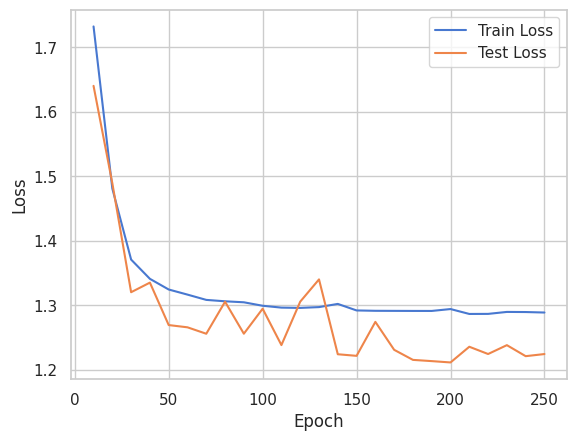

In [37]:
epoch_count = list(range(10,epochs+1,10))
plt.plot(epoch_count,train_losses,label='Train Loss')
plt.plot(epoch_count,test_losses,'-',label='Test Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Accuracy = 0.9383886255924171


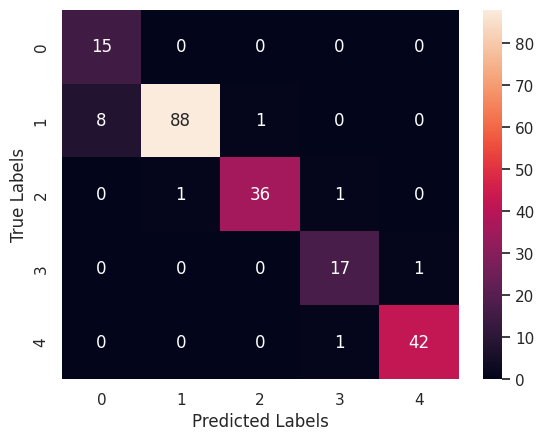

In [38]:
y_c_hat5 = model(X_test_tensor).argmax(1).detach().cpu().numpy()
print(f'Accuracy = {accuracy_score(y_c,y_c_hat5)}')
cm = confusion_matrix(y_c,y_c_hat5)
sns.heatmap(cm,annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [39]:
torch.save(model.state_dict(),"./fcnn_state.pth")

In [ ]:
#Load from saved file after first attempt instead of retraining entire model

'''
model = nn.Sequential(
    nn.Linear(3,8),
    nn.ELU(),
    nn.Linear(8,8),
    nn.ELU(),
    nn.Linear(8,8),
    nn.ELU(),
    nn.Linear(8,5),
    nn.Softmax(dim=1)
)
model.load_state_dict("./fcnn_state.pth")
'''

# Comparison of Models

In [40]:
from sklearn.metrics import f1_score,cohen_kappa_score

preds = [y_c_hat,y_c_hat2,y_c_hat3,y_c_hat4,y_c_hat5]
labels = ['OLS','SVR','MLR','DT','ANN']
metrics = ['F1 Score','Kappa','Accuracy']
f1_scores = []
kappas = []
accuracies = []

for pred in preds:
    f1_scores.append(f1_score(y_c,pred,average='macro'))
    kappas.append(cohen_kappa_score(y_c,pred))
    accuracies.append(accuracy_score(y_c,pred))

d = {
    'F1 Score' : f1_scores,
    'Kappa' : kappas,
    'Accuracy' : accuracies
}
score_df = pd.DataFrame(data=d,index=labels)

score_df

,F1 Score,Kappa,Accuracy
OLS,0.833683,0.869825,0.909953
SVR,0.843164,0.876351,0.914692
MLR,0.790057,0.799554,0.862559
DT,0.818550,0.823397,0.876777
ANN,0.918275,0.914136,0.938389


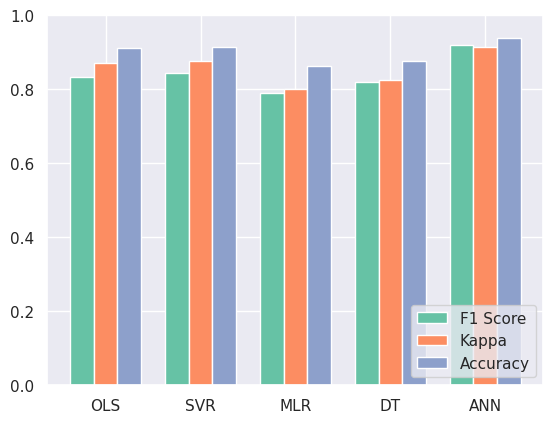

In [41]:
sns.set_palette(sns.color_palette("Set2"))
sns.set_style('darkgrid')

x = np.arange(len(labels))
width = 0.25 
multiplier = 0

fig, ax = plt.subplots()
for attr, val in d.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, val, width, label=attr)
    multiplier += 1

ax.set_xticks(x + width, labels)
ax.legend(loc='lower right')
ax.set_ylim(0, 1)

plt.show()